# In this lesson, we are looking for whether there is a possibility of repaying the loan

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('LoansTrainingSet.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [5]:
df.drop('Loan ID', axis=1, inplace=True)
df.drop('Customer ID', axis=1, inplace=True)

In [6]:
df['Purpose'].value_counts()

Purpose
Debt Consolidation      203911
Home Improvements        14915
other                    14268
Other                     9667
Business Loan             4712
Buy a Car                 3276
Medical Bills             2868
Take a Trip               1570
Buy House                 1530
Educational Expenses       267
Name: count, dtype: int64

In [7]:
df['Purpose'] = df['Purpose'].str.replace('other', 'Other')

In [8]:
df['Purpose'].value_counts()

Purpose
Debt Consolidation      203911
Other                    23935
Home Improvements        14915
Business Loan             4712
Buy a Car                 3276
Medical Bills             2868
Take a Trip               1570
Buy House                 1530
Educational Expenses       267
Name: count, dtype: int64

In [9]:
df['Home Ownership'].value_counts()

Home Ownership
Home Mortgage    124477
Rent             109010
Own Home          22923
HaveMortgage        574
Name: count, dtype: int64

In [10]:
df['Home Ownership'] = df['Home Ownership'].str.replace('Home Mortgage', 'HaveMortgage')

In [11]:
df['Home Ownership'].value_counts()

Home Ownership
HaveMortgage    125051
Rent            109010
Own Home         22923
Name: count, dtype: int64

In [12]:
df['Term'].value_counts()

Term
Short Term    192632
Long Term      64352
Name: count, dtype: int64

In [13]:
e={'Short Term': 1, 'Long Term': 2}

In [14]:
df['Term']=df['Term'].map(e)

In [15]:
df['Term'].value_counts()

Term
1    192632
2     64352
Name: count, dtype: int64

In [16]:
df.isnull().sum()

Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [17]:
df['Credit Score']=df['Credit Score'].fillna(df['Credit Score'].mean())
df['Annual Income']=df['Annual Income'].fillna(df['Annual Income'].mean())
df['Months since last delinquent']=df['Months since last delinquent'].fillna(df['Months since last delinquent'].mean())
df['Bankruptcies']=df['Bankruptcies'].fillna(df['Bankruptcies'].mean())
df['Tax Liens']=df['Tax Liens'].fillna(df['Tax Liens'].mean())

In [18]:
df.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Years in current job            11476
Home Ownership                      0
Annual Income                       0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
dtype: int64

In [19]:
df['Years in current job']=df['Years in current job'].fillna(df['Years in current job'].mode()[0])

In [20]:
df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256984 non-null  object 
 1   Current Loan Amount           256984 non-null  int64  
 2   Term                          256984 non-null  int64  
 3   Credit Score                  256984 non-null  float64
 4   Years in current job          256984 non-null  object 
 5   Home Ownership                256984 non-null  object 
 6   Annual Income                 256984 non-null  float64
 7   Purpose                       256984 non-null  object 
 8   Monthly Debt                  256984 non-null  object 
 9   Years of Credit History       256984 non-null  float64
 10  Months since last delinquent  256984 non-null  float64
 11  Number of Open Accounts       256984 non-null  int64  
 12  Number of Credit Problems     256984 non-nul

In [22]:
df['Loan Status'].value_counts()

Loan Status
Fully Paid     176191
Charged Off     80793
Name: count, dtype: int64

In [23]:
d={'Charged Off': 0, 'Fully Paid': 1}

In [24]:
df['Loan Status']=df['Loan Status'].map(d)

In [25]:
df['Loan Status'].value_counts()

Loan Status
1    176191
0     80793
Name: count, dtype: int64

In [26]:
bos=df[df['Loan Status'].isnull()]
dolu=df[df['Loan Status'].notnull()]

In [27]:
bos.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


In [28]:
dolu.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520,1,741.0,10+ years,HaveMortgage,33694.0,Debt Consolidation,$584.03,12.3,41.00000,10,0,6760,16056,0.0,0.0
1,1,3441,1,734.0,4 years,HaveMortgage,42269.0,Other,"$1,106.04",26.3,34.88145,17,0,6262,19149,0.0,0.0
2,1,21029,1,747.0,10+ years,HaveMortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,34.88145,5,0,20967,28335,0.0,0.0
3,1,18743,1,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,34.88145,9,0,22529,43915,0.0,0.0
4,1,11731,1,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,34.88145,12,0,17391,37081,0.0,0.0


In [29]:
import pandas as pd

In [30]:
df['Monthly Debt'] = df['Monthly Debt'].replace('[^\d.]', '', regex=True).astype(float)


In [31]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520,1,741.0,10+ years,HaveMortgage,33694.0,Debt Consolidation,584.03,12.3,41.00000,10,0,6760,16056,0.0,0.0
1,1,3441,1,734.0,4 years,HaveMortgage,42269.0,Other,1106.04,26.3,34.88145,17,0,6262,19149,0.0,0.0
2,1,21029,1,747.0,10+ years,HaveMortgage,90126.0,Debt Consolidation,1321.85,28.8,34.88145,5,0,20967,28335,0.0,0.0
3,1,18743,1,747.0,10+ years,Own Home,38072.0,Debt Consolidation,751.92,26.2,34.88145,9,0,22529,43915,0.0,0.0
4,1,11731,1,746.0,4 years,Rent,50025.0,Debt Consolidation,355.18,11.5,34.88145,12,0,17391,37081,0.0,0.0


In [32]:
filtre=df['Maximum Open Credit']!='#VALUE!'
df=df[filtre]

In [33]:
df['Maximum Open Credit'] =df['Maximum Open Credit'].astype('int32')

In [34]:
df['Maximum Open Credit'].value_counts()

Maximum Open Credit
0        1831
11044      21
10180      21
16303      20
9082       20
         ... 
83568       1
78638       1
57799       1
45584       1
62371       1
Name: count, Length: 68986, dtype: int64

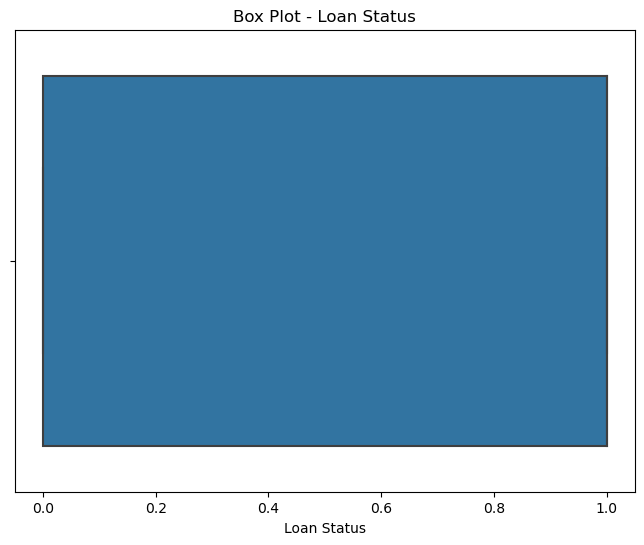

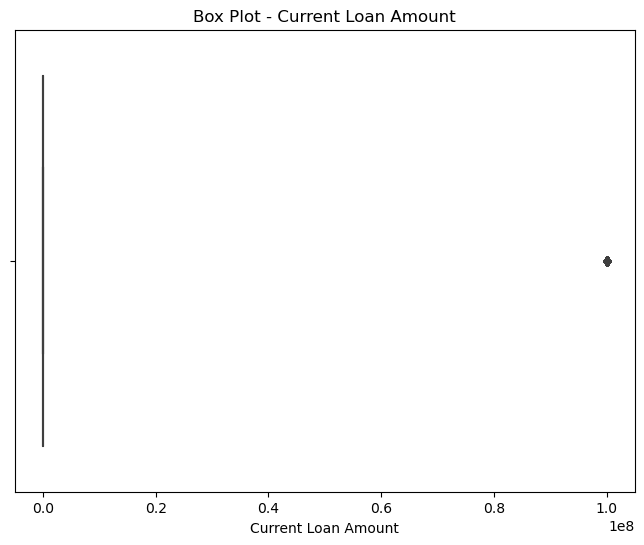

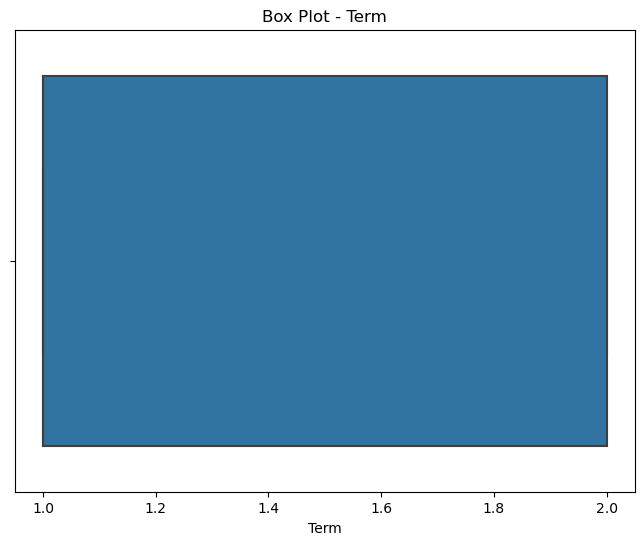

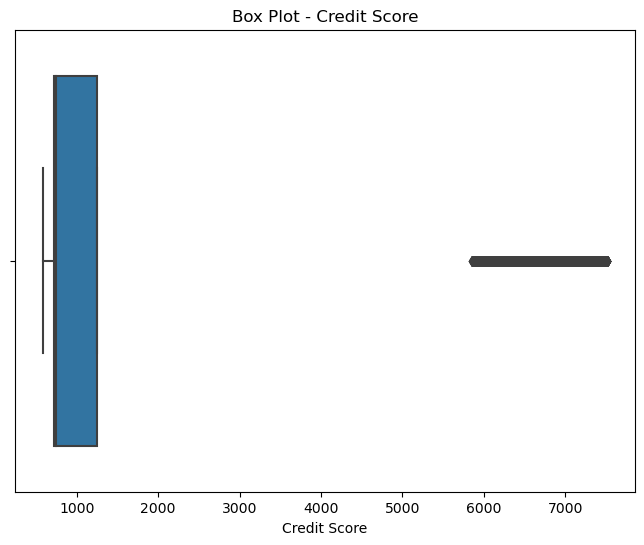

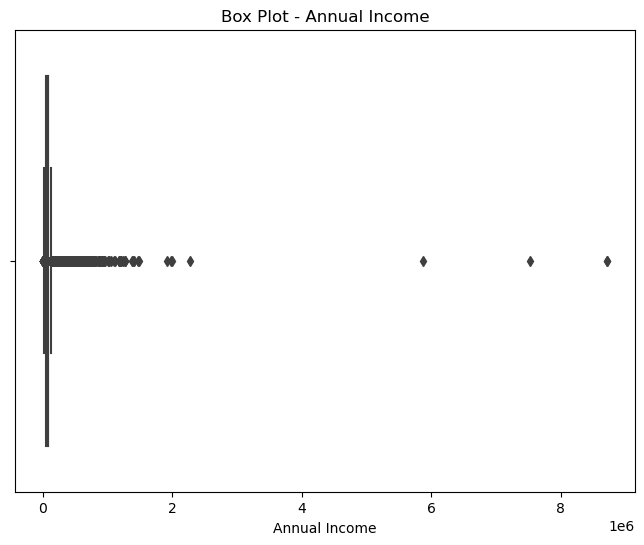

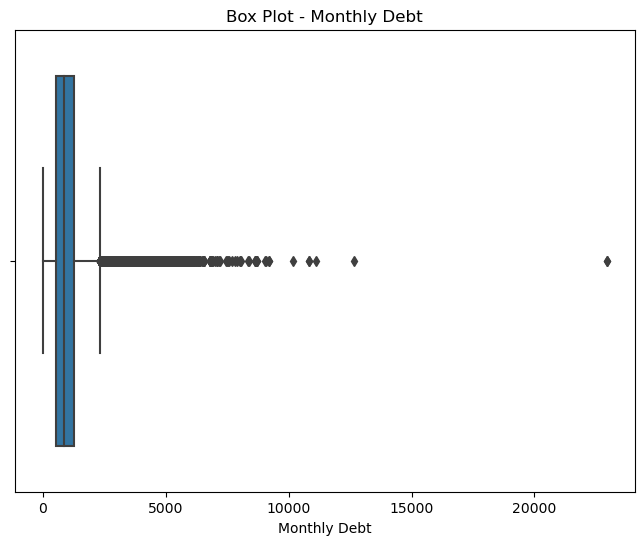

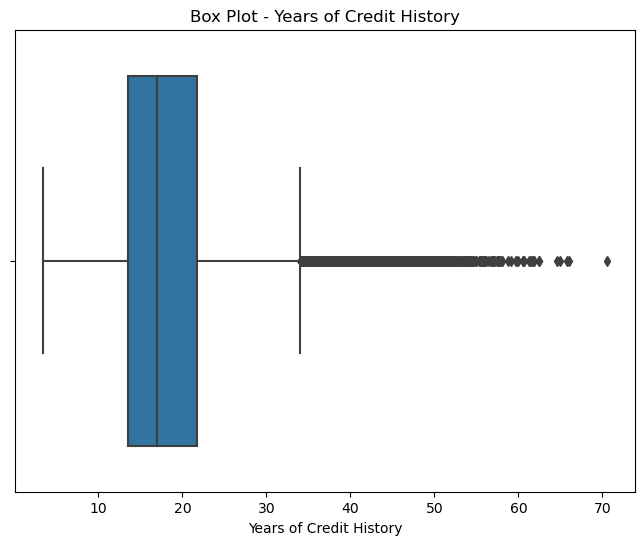

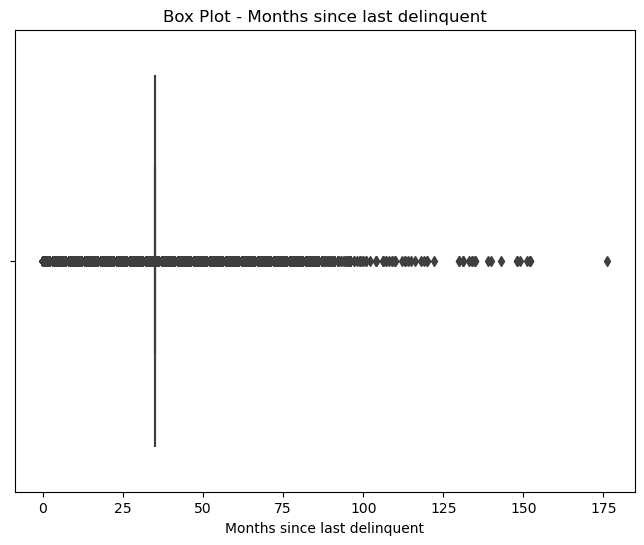

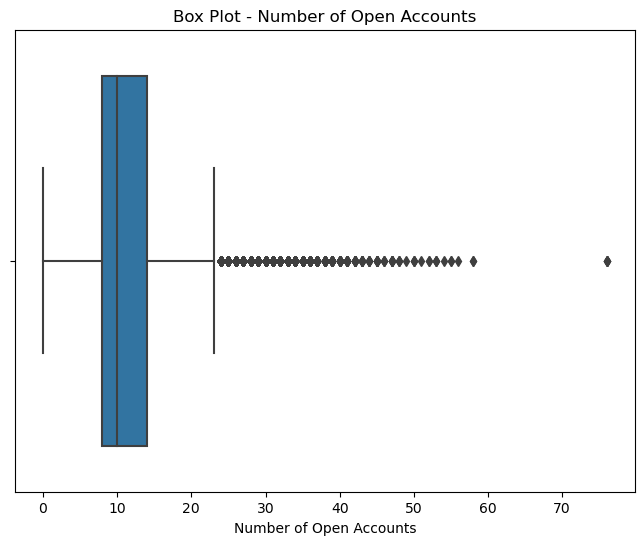

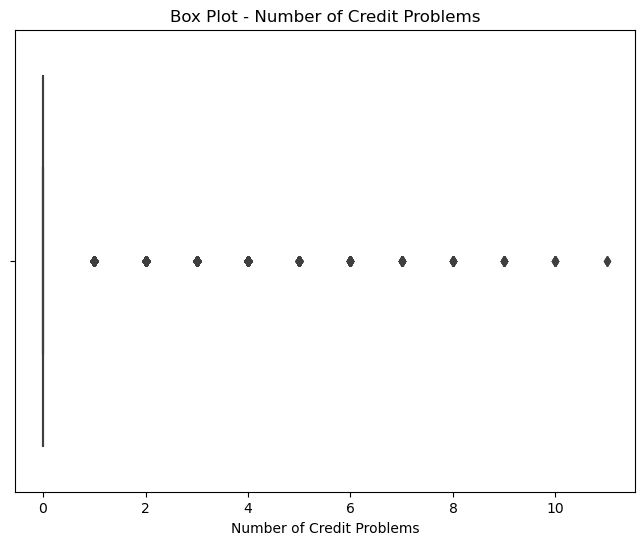

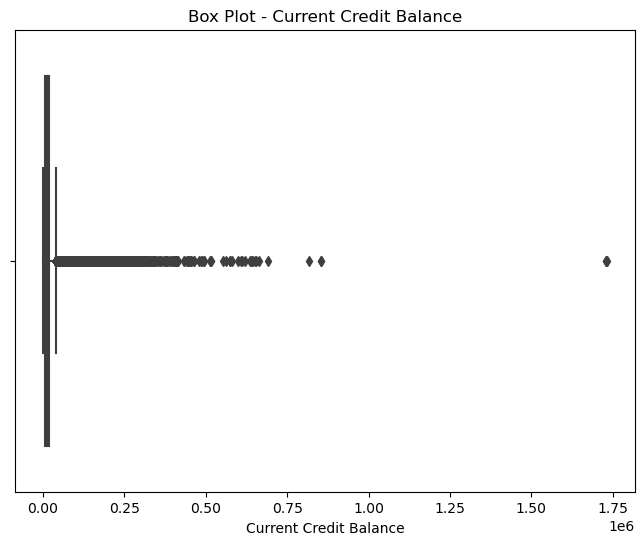

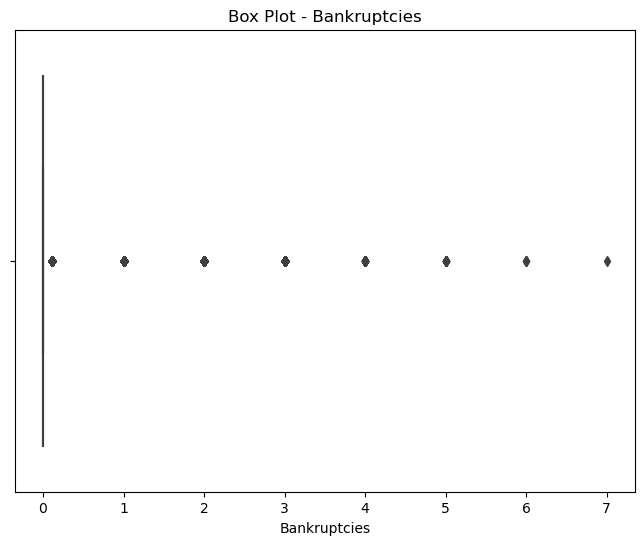

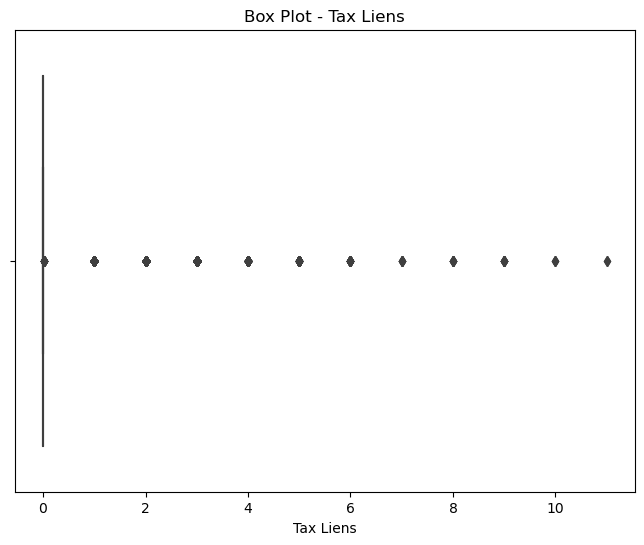

In [35]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def visualize_outliers(df):
    for column in df.columns:
        if df[column].dtype in [np.int64, np.float64]: 
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[column])
            plt.title(f'Box Plot - {column}')
            plt.show()

visualize_outliers(df)

In [36]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Years in current job', 'Home Ownership', 'Annual Income', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [37]:
import numpy as np

In [38]:
df['Credit Score'].value_counts()

Credit Score
1251.116099    61675
747.000000      5669
740.000000      5537
741.000000      5499
746.000000      5486
               ...  
6070.000000        3
5980.000000        3
5910.000000        3
5930.000000        2
5860.000000        1
Name: count, Length: 335, dtype: int64

In [39]:
df2=df.head()

In [40]:
df2

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520,1,741.0,10+ years,HaveMortgage,33694.0,Debt Consolidation,584.03,12.3,41.00000,10,0,6760,16056,0.0,0.0
1,1,3441,1,734.0,4 years,HaveMortgage,42269.0,Other,1106.04,26.3,34.88145,17,0,6262,19149,0.0,0.0
2,1,21029,1,747.0,10+ years,HaveMortgage,90126.0,Debt Consolidation,1321.85,28.8,34.88145,5,0,20967,28335,0.0,0.0
3,1,18743,1,747.0,10+ years,Own Home,38072.0,Debt Consolidation,751.92,26.2,34.88145,9,0,22529,43915,0.0,0.0
4,1,11731,1,746.0,4 years,Rent,50025.0,Debt Consolidation,355.18,11.5,34.88145,12,0,17391,37081,0.0,0.0


In [41]:
x=df.drop('Loan Status',axis=1)
y=df[['Loan Status']]

In [42]:
x=pd.get_dummies(x,drop_first=True)

In [43]:
x

,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
0,11520,1,741.000000,33694.000000,584.03,12.3,41.00000,10,0,6760,16056,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,3441,1,734.000000,42269.000000,1106.04,26.3,34.88145,17,0,6262,19149,0.0,0.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,21029,1,747.000000,90126.000000,1321.85,28.8,34.88145,5,0,20967,28335,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,18743,1,747.000000,38072.000000,751.92,26.2,34.88145,9,0,22529,43915,0.0,0.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
4,11731,1,746.000000,50025.000000,355.18,11.5,34.88145,12,0,17391,37081,0.0,0.0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256979,3911,1,1251.116099,71952.716187,1706.58,19.9,34.88145,16,0,43992,44080,0.0,0.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
256980,5078,1,737.000000,77186.000000,1376.47,19.1,47.00000,9,0,1717,9758,0.0,0.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
256981,12116,1,7460.000000,52504.000000,297.96,15.1,82.00000,8,0,3315,20090,0.0,0.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
256982,12116,1,746.000000,52504.000000,297.96,15.1,82.00000,8,0,3315,20090,0.0,0.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


In [44]:
y=pd.get_dummies(y,drop_first=True)

In [45]:
y

,Loan Status
0,1
1,1
2,1
3,1
4,1
...,...
256979,1
256980,1
256981,0
256982,0


In [46]:
from  sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
def model_classification(X,y):
    '''
    X: independent variable
    y: dependent variable
    return best model and its accuracy
    '''
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    models = [GaussianNB(),BernoulliNB(),LogisticRegression(),RandomForestClassifier(),DecisionTreeRegressor(),GradientBoostingClassifier()]
    results=[]
    for model in models:
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print("Model: ",model)
        print("Model Accuracy: ",accuracy_score(model_predict,y_test))
        print("Model Confusion Matrix: ",confusion_matrix(model_predict,y_test),"\n")
        print("Model Classification Report: ",classification_report(model_predict,y_test))
        print("-"*50)
        results.append(accuracy_score(model_predict,y_test))
    #best model
    best_model=models[results.index(max(results))]
    print("Best Model: ",best_model)
    print("Best Model Accuracy: ",max(results))
    return best_model,max(results), confusion_matrix(model_predict,y_test)



model_classification(x,y)

Model:  GaussianNB()
Model Accuracy:  0.45147482294341973
Model Confusion Matrix:  [[24174 42227]
 [   61 10632]] 

Model Classification Report:                precision    recall  f1-score   support

           0       1.00      0.36      0.53     66401
           1       0.20      0.99      0.33     10693

    accuracy                           0.45     77094
   macro avg       0.60      0.68      0.43     77094
weighted avg       0.89      0.45      0.51     77094

--------------------------------------------------
Model:  BernoulliNB()
Model Accuracy:  0.6856694424987677
Model Confusion Matrix:  [[    2     0]
 [24233 52859]] 

Model Classification Report:                precision    recall  f1-score   support

           0       0.00      1.00      0.00         2
           1       1.00      0.69      0.81     77092

    accuracy                           0.69     77094
   macro avg       0.50      0.84      0.41     77094
weighted avg       1.00      0.69      0.81     77094

---

(RandomForestClassifier(),
 0.8362259060367863,
 array([[ 8544,  2452],
        [15691, 50407]]))